# Lead Scoring Case Study

The steps we will follow in this exercise are as follows:

1.Reading, Understanding and Visualising the data

2.Preparing the data for modeling (train-test split, rescalling etc.)

3.Training the Model

4.Predictions and evalution on the test set

5.Model Evalution

# Reading and Understanding the Data

In [1]:
#Importing  necessary libraries:--
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Load the dataset
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads_df.shape

(9240, 37)

In [5]:
len(leads_df)

9240

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning Data

In [7]:
# finding Null Values:
leads_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
#more than or equal to 40% NULL values:-
### if a column contains more than 40% of its null values,delete that column

Percentage_of_null=(leads_df.isnull().sum()/len(leads_df)*100).sort_values(ascending = False).head(40)
Percentage_of_null

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
#Removing columns with > 40% of null values

drop_null=Percentage_of_null[Percentage_of_null>=40]
drop_null

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Score     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Index     45.649351
dtype: float64

In [10]:
##dropping the above columns

leads_df1=leads_df.drop(columns=drop_null.index)

In [11]:
leads_df1.shape

(9240, 32)

In [12]:
# Converting 'Select' values to NaN.
leads_df1 = leads_df1.replace('Select', np.nan)

In [13]:
Percentage_of_null=(leads_df1.isnull().sum()/len(leads_df1)*100).sort_values(ascending = False).head(40)
Percentage_of_null

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [14]:
# Checking for duplicate values
leads_df1[leads_df1.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [15]:
leads_df1.shape

(9240, 32)

In [16]:
##Now we have 32 columns:-
##Examine the following columns with empty values <36 :-

In [17]:
##Tags column analysis:-
leads_df1['Tags'].value_counts().head()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [18]:
leads_df1['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [19]:
#'Tags' column will not provide valuable information, hence dropping the column.

In [20]:
leads_df1.drop('Tags',axis=1,inplace=True)

In [21]:
#Analise Lead Profile   

In [22]:
leads_df1['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
leads_df1['Lead Profile'].describe()

count               2385
unique                 5
top       Potential Lead
freq                1613
Name: Lead Profile, dtype: object

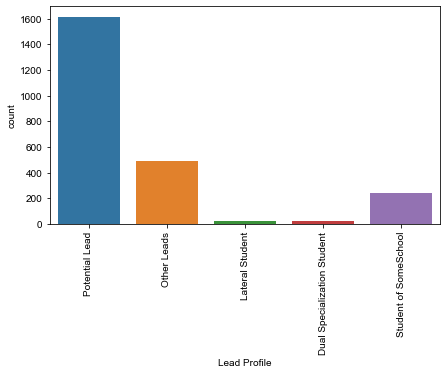

In [24]:
plt.figure(figsize = (7,4))
sns.countplot(x= 'Lead Profile', data=leads_df1)
plt.xticks(rotation=90)
#plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.show()

In [25]:
#'Lead Profile' column will not provide valuable information, hence dropping the column.

In [26]:
leads_df1.drop('Lead Profile',axis=1,inplace=True)

In [27]:
leads_df1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
leads_df1['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [29]:
leads_df1['What matters most to you in choosing a course'].fillna(value = 'Better Career Prospects', inplace = True)

In [30]:
leads_df1['What matters most to you in choosing a course'].isna().sum()

0

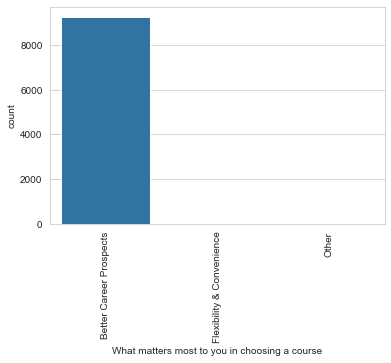

In [31]:
plt.figure(figsize = (6,4))
sns.countplot(x= 'What matters most to you in choosing a course', data=leads_df1)
plt.xticks(rotation=90)
#plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.show()

In [32]:
leads_df1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
leads_df1['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [34]:
leads_df1['What is your current occupation'].fillna(value = 'Unemployed', inplace = True)

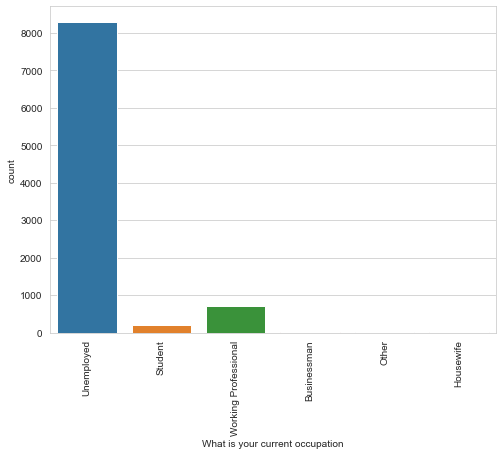

In [35]:
plt.figure(figsize = (8,6))
sns.countplot(x= 'What is your current occupation', data=leads_df1)
plt.xticks(rotation=90)
#plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.show()

In [36]:
leads_df1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [37]:
leads_df1['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#'Country and City' column will not provide valuable information, hence dropping the column.

In [38]:
leads_df1.drop(['Country','City'],axis=1,inplace=True)

In [39]:
leads_df1['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [40]:
leads_df1['How did you hear about X Education'].describe()

count              1990
unique                9
top       Online Search
freq                808
Name: How did you hear about X Education, dtype: object

In [41]:
#'How did you hear about X Education'  have a very high value for 'Select'. These columns will not provide valuable information due to the Select option, hence they my be dropped.

In [42]:
leads_df1.drop('How did you hear about X Education',axis=1,inplace=True)

In [43]:
leads_df1['What is your current occupation'].fillna(value = 'What is your current occupation', inplace = True)

In [44]:
leads_df1['What is your current occupation'].isna().sum()

0

In [45]:
leads_df1['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [46]:
leads_df1['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [47]:
leads_df1['Specialization'].replace(np.nan,'Not Specified',inplace = True)

In [48]:
leads_df1['Specialization'] = leads_df1['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [49]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

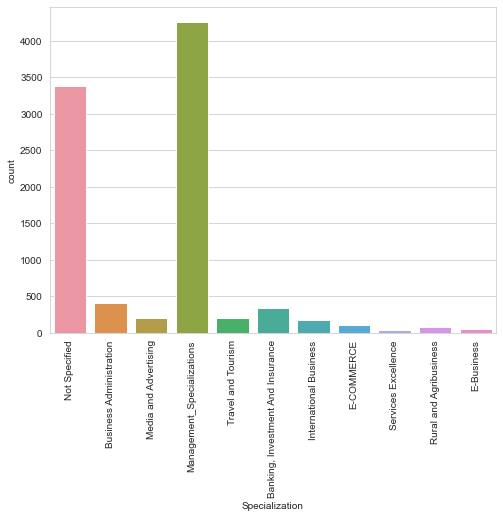

In [50]:
plt.figure(figsize = (8,6))
sns.countplot(x= 'Specialization', data=leads_df1)
plt.xticks(rotation=90)
#plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.show()

In [51]:
Percentage_of_null=(leads_df1.isnull().sum()/len(leads_df1)*100).sort_values(ascending = False).head()
Percentage_of_null

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
Prospect ID             0.000000
dtype: float64

In [52]:
#Analysis of Page 'Views Per Visit' column
#nullable values = 1.48%
leads_df1['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [53]:
leads_df1['TotalVisits'].replace(np.NaN, leads_df1['TotalVisits'].median(), inplace =True)
leads_df1['Page Views Per Visit'].replace(np.NaN, leads_df1['Page Views Per Visit'].median(), inplace =True)

In [54]:
Percentage_of_null=(leads_df1.isnull().sum()/len(leads_df1)*100).sort_values(ascending = False).head()
Percentage_of_null

Last Activity                             1.114719
Lead Source                               0.389610
Prospect ID                               0.000000
Magazine                                  0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [55]:
leads_df1['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [56]:
leads_df1['Lead Source'] = leads_df1['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')
leads_df1['Lead Source'] = leads_df1['Lead Source'].replace('Facebook','Social Media')

In [57]:
leads_df1['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
leads_df1['Last Activity'] = leads_df1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [59]:
leads_df1['Lead Source'].fillna('Others', inplace = True)
leads_df1['Last Activity'].fillna('Others', inplace = True)

In [60]:
Percentage_of_null=(leads_df1.isnull().sum()/len(leads_df1)*100).sort_values(ascending = False).head(40)
Percentage_of_null

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [61]:
leads_df1.shape

(9240, 27)

In [62]:
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

# Univariate Analysis and Bivariate Analysis

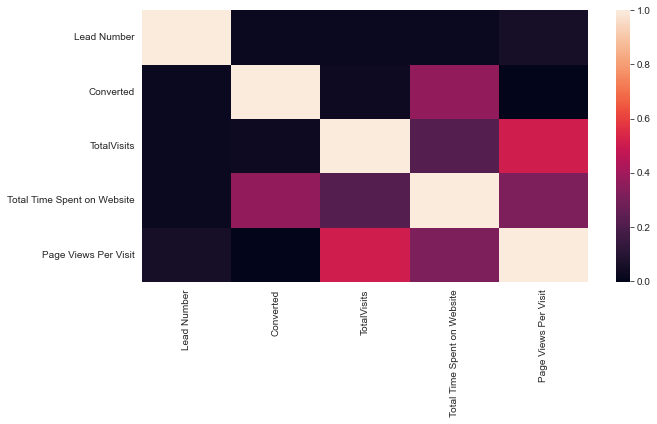

In [63]:
#correlation between different variables for both dataframes with target=1 and target=0
plt.figure(figsize=(10,5))
sns.heatmap(leads_df1.corr())
plt.show()

In [64]:
#Converted target variable, whether a lead has been successfully converted (1) or not (0)
Converted = (sum(leads_df1['Converted'])/len(leads_df1['Converted'].index))*100

In [65]:
Converted

38.53896103896104

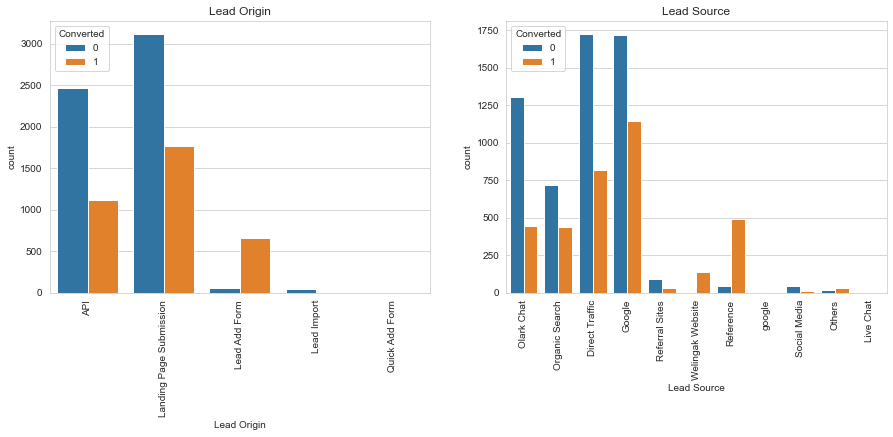

In [66]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

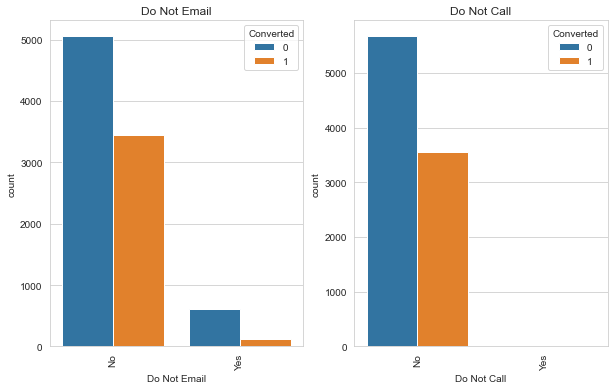

In [67]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'TotalVisits')

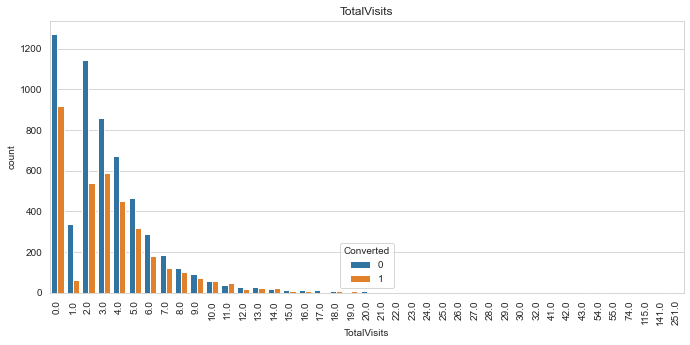

In [68]:
plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.countplot(x='TotalVisits', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('TotalVisits')


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

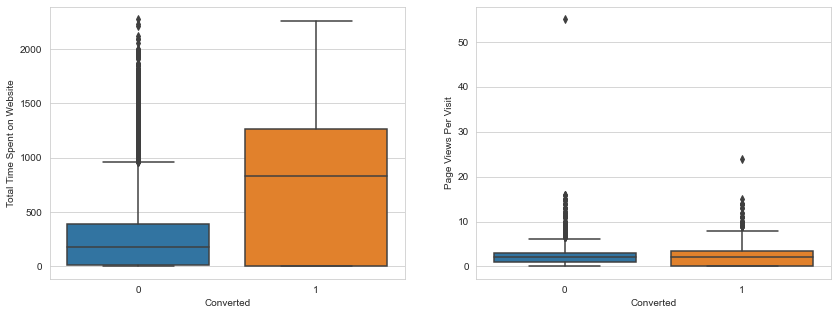

In [69]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df1)

plt.subplot(1,2,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df1)

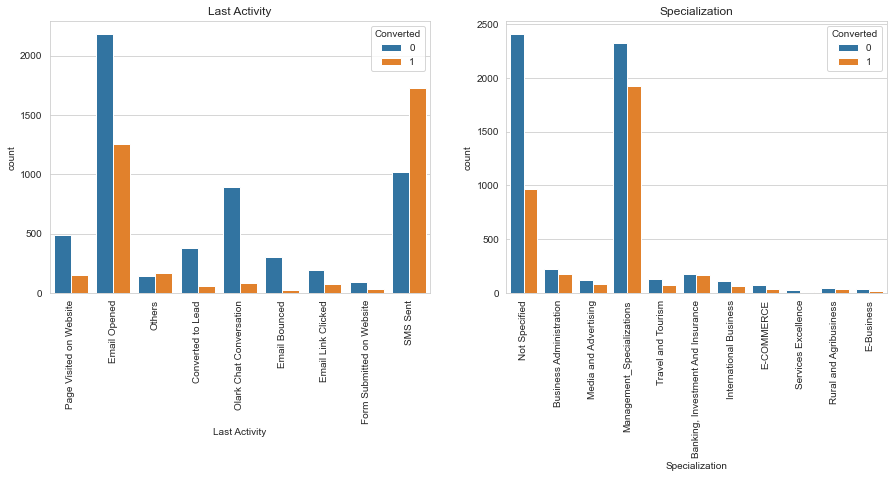

In [70]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()


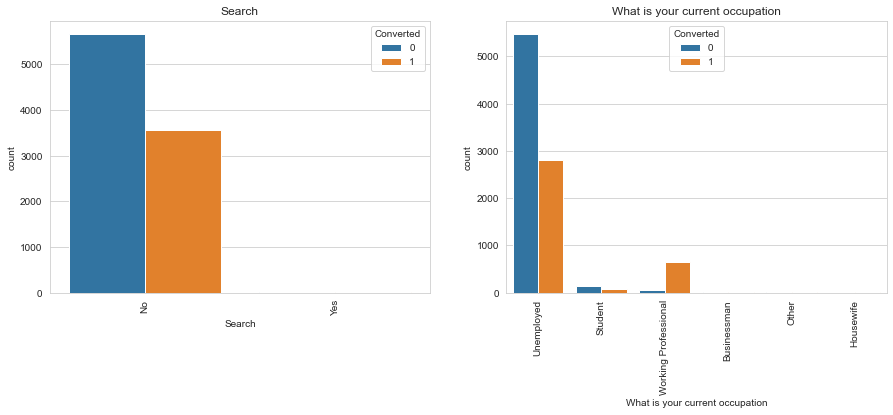

In [71]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Search', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

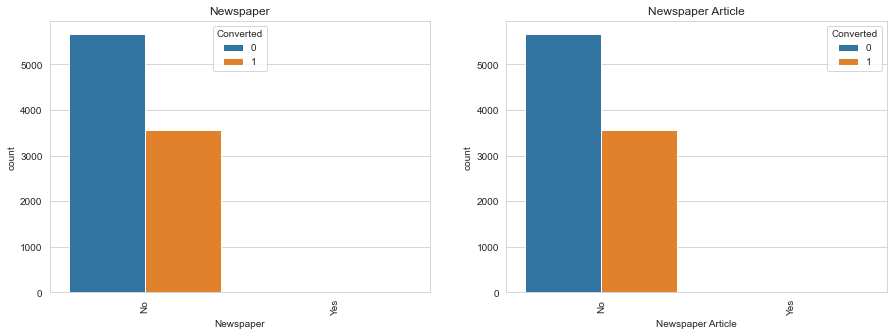

In [72]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
plt.show()

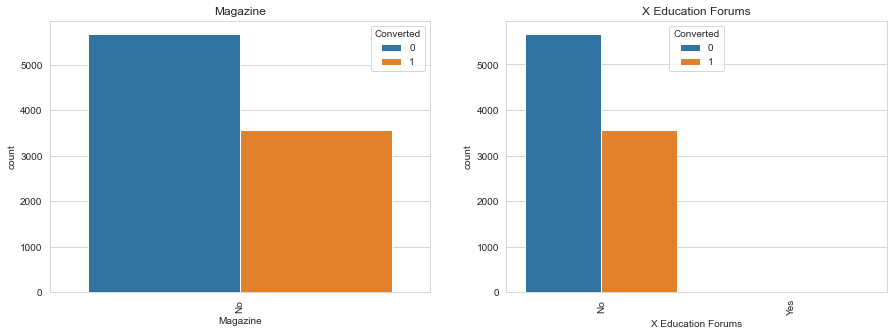

In [73]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Magazine', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Magazine')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

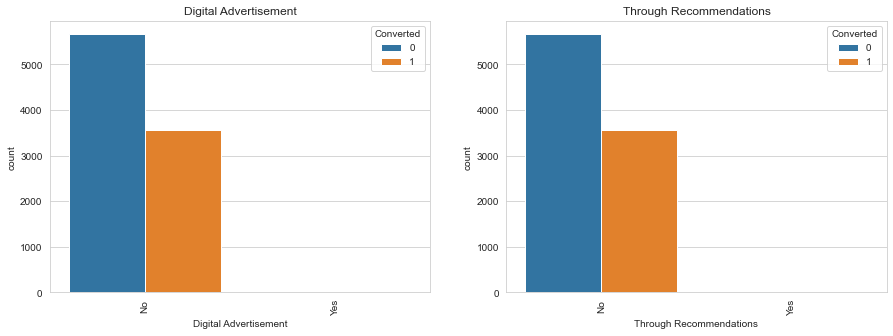

In [74]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(1,2,2)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
plt.show()

Text(0.5, 1.0, 'Receive More Updates About Our Courses')

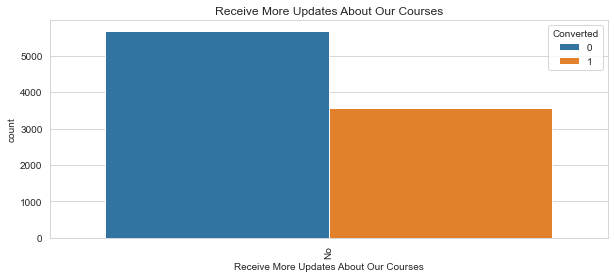

In [75]:
plt.figure(figsize = (10,4))

sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Receive More Updates About Our Courses')

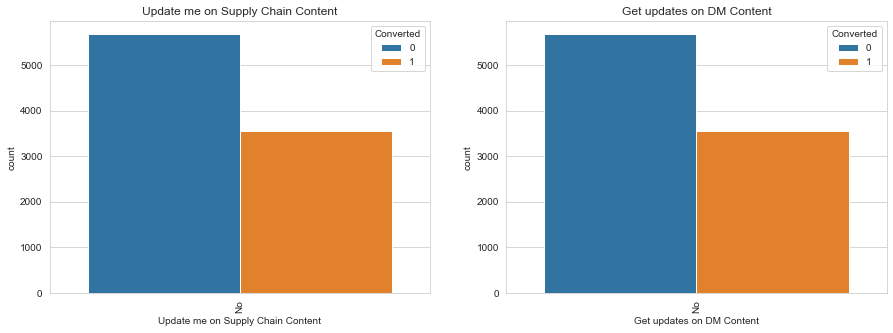

In [76]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Update me on Supply Chain Content')

plt.subplot(1,2,2)
sns.countplot(x='Get updates on DM Content', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')
plt.show()

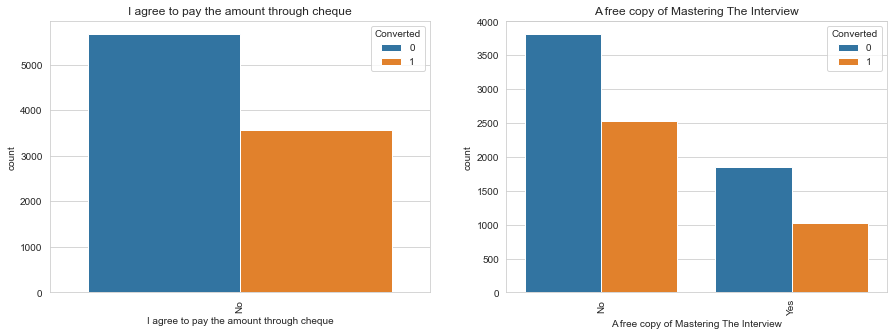

In [77]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('I agree to pay the amount through cheque')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

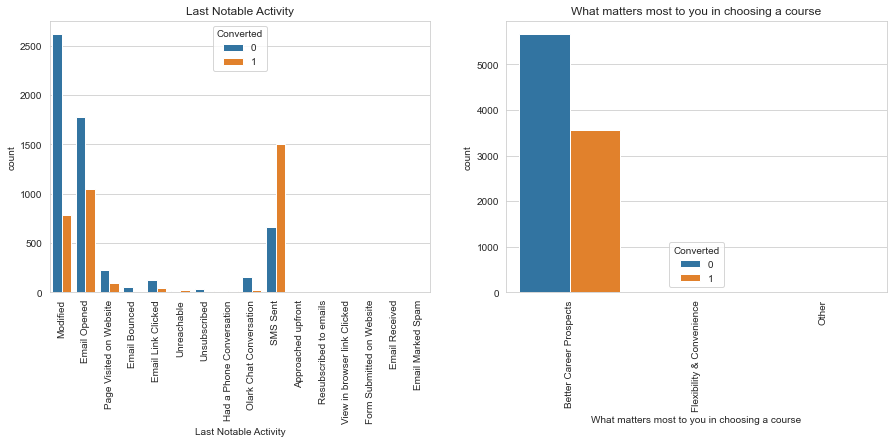

In [78]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

In [79]:
#Removing unwanted columns:-
leads_df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
drop_col=leads_df1.drop(['Prospect ID','Search','Do Not Call','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Lead Number'],axis=1,inplace= True)

In [81]:

leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

In [82]:
leads_df1.shape

(9240, 12)

# Dummy Variables

# Creating dummies of Categorical Variables

In [83]:
dummy_status= pd.get_dummies(leads_df1[['Lead Origin', 'Lead Source','Do Not Email','Last Activity', 'Specialization',
       'What is your current occupation','Last Notable Activity','What matters most to you in choosing a course']])
dummy_status.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
# dropping a redundant dummy var
dummy_status = pd.get_dummies(dummy_status,drop_first=True )

In [85]:
# Adding the dummy variables to the original dataset
leads_df1 = pd.concat([leads_df1,dummy_status],axis = 1)

In [86]:
leads_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0


In [87]:
leads_df1 = leads_df1.drop(['Lead Origin', 'Lead Source','Do Not Email','Last Activity', 'Specialization',
       'What is your current occupation','Last Notable Activity','What matters most to you in choosing a course'], axis = 1)

In [88]:
leads_df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
leads_df1.shape

(9240, 67)

# Splitting the data into train and test set

In [90]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [91]:
X=leads_df1.drop('Converted', axis=1)

In [92]:
# Putting target variable to y
y = leads_df1['Converted']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [94]:
X_train.shape

(6468, 66)

In [95]:
X_test.shape

(2772, 66)

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 66 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TotalVisits                                                              6468 non-null   float64
 1   Total Time Spent on Website                                              6468 non-null   int64  
 2   Page Views Per Visit                                                     6468 non-null   float64
 3   Lead Origin_API                                                          6468 non-null   uint8  
 4   Lead Origin_Landing Page Submission                                      6468 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                6468 non-null   uint8  
 6   Lead Origin_Lead Import                                              

# Rescalling the features

In [97]:
#1-Min-Max scaling
#2-Standardisation (mean-0, sigma-1)
#This time, we will use MinMax scaling.
#normaliisation:(x-xmin)/(xmax-xmin)
#standarddisation:(x-mu)/sigma

In [98]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.015936,0.214349,0.024182,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3516,0.019920,0.046655,0.045455,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0.019920,0.541373,0.090909,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


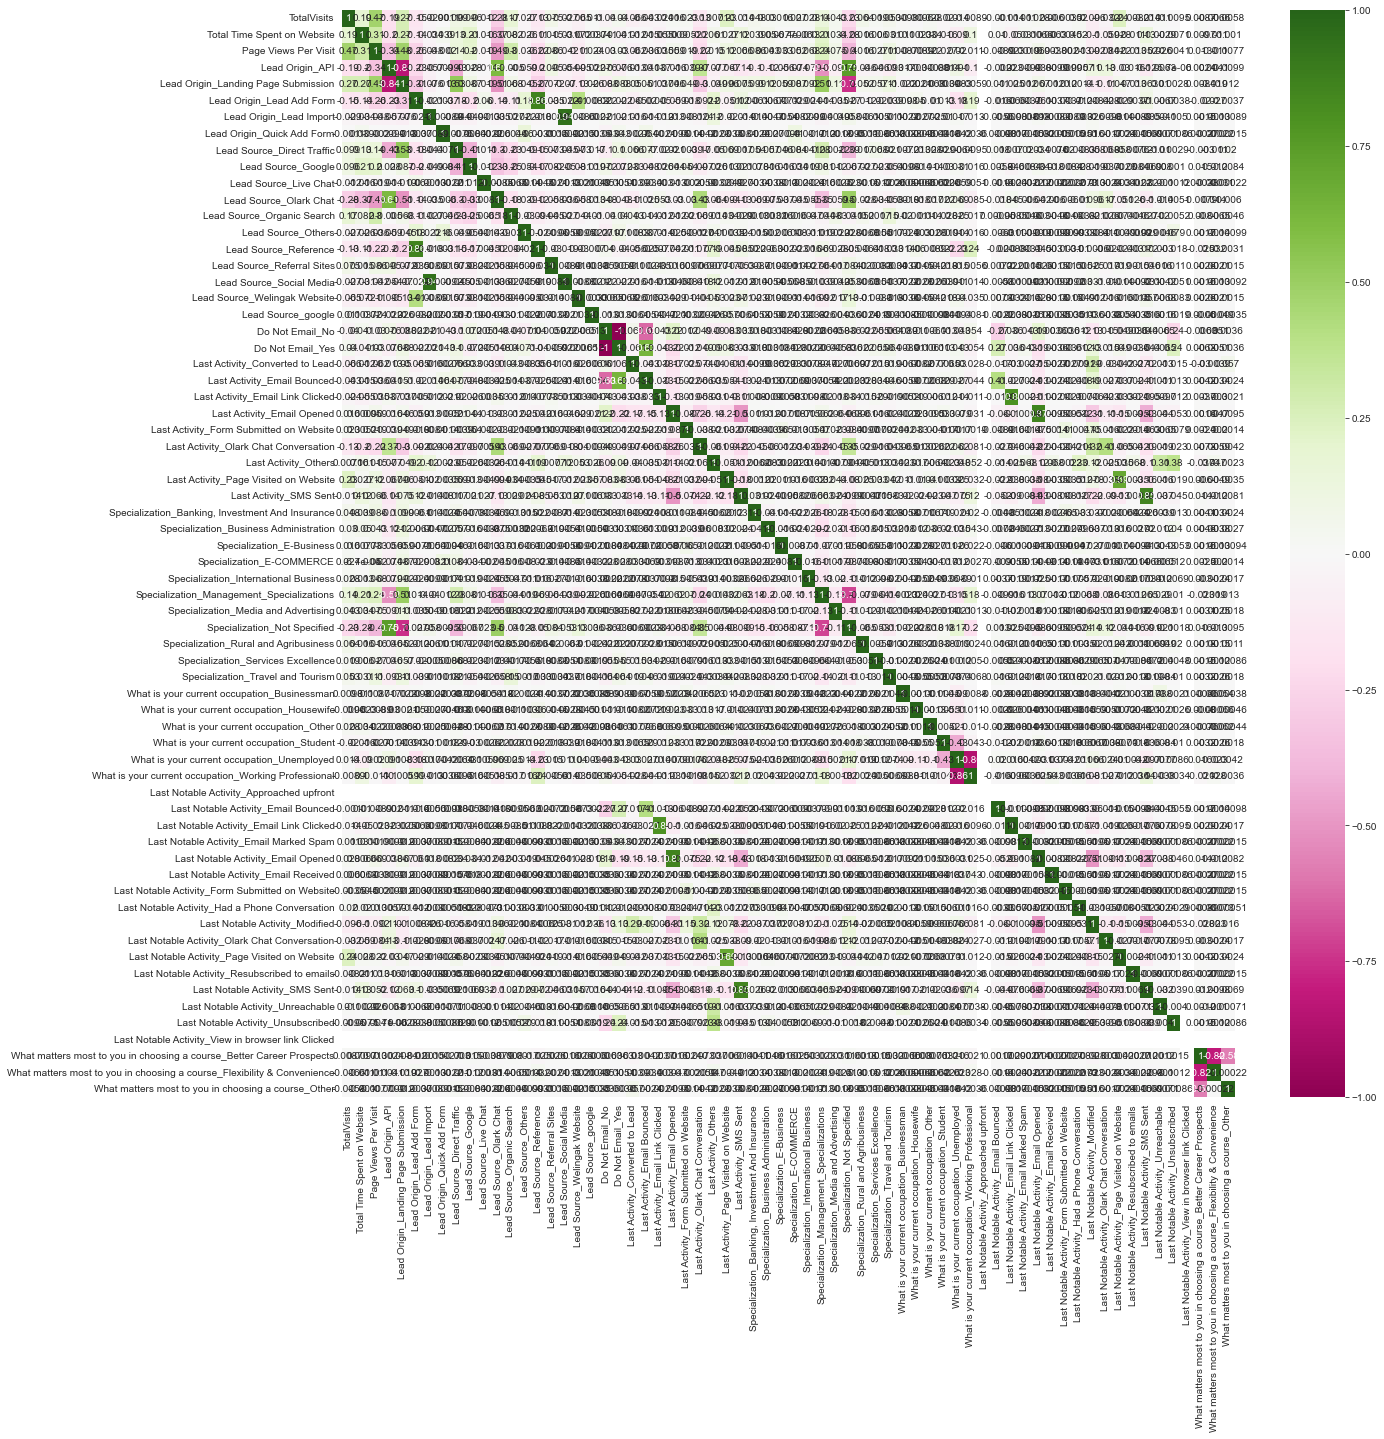

In [99]:
#heatmap
## Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="PiYG")
plt.show()

# Model Building using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [101]:
rfe = RFE(logreg,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_


array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False])

In [103]:
rfe.ranking_

array([ 1,  1,  1, 24,  1,  1,  8, 37,  4,  7, 34, 22,  6, 48, 36,  5, 28,
        1, 25, 10,  1, 20, 19, 50,  1, 41, 13, 27, 40,  1, 33, 38, 46, 30,
       21, 47, 42,  1, 16, 39, 43, 18,  1, 17, 15, 14,  1, 51, 26, 11, 29,
        2, 44, 35,  1,  1,  3, 12,  9, 32,  1, 45, 52, 23, 31, 49])

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 25),
 ('Do Not Email_No', False, 10),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 50),
 ('Last Activity_Email Opened', True

In [105]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe
cols = X_train.columns[rfe.support_]
print(cols)
print(len(cols))

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')
15


# Model-1

In [106]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.8
Date:                Mon, 27 Feb 2023   Deviance:                       5325.7
Time:                        20:14:00   Pearson chi2:                 6.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9966      0.150     -6.649      0.000      -1.290      -0.703
TotalVisits                                              7.2179      2.220      3.251      0.001       2.867      11.569
Total Time Spent on Website                              4.1607      0.155     26.877      0.000       3.857       4.464
Page Views Per Visit                                    -6.4126      1.251     -5.125      0.000      -8.865      -3.960
Lead Origin_Landing Page Submission                     -1.3663      0.124    -11.051      0.000      -1.609      -1.124
Lead Origin_Lead Add Form                                2.6652      0.195     13.701      0.000       2.284       3.046
Lead Source_Welingak Website                             2.4388      0.746      3.267      0.001       0.976       3.902
Do Not Email_Yes                                        -1.0319      0.171     -6.034      0.000      -1.367      -0.697
Last Activity_Email Opened                               0.5587      0.104      5.357      0.000       0.354       0.763
Last Activity_SMS Sent                                   1.7443      0.105     16.654      0.000       1.539       1.950
Specialization_Not Specified                            -1.1531      0.123     -9.359      0.000      -1.395      -0.912
What is your current occupation_Housewife               23.0564   1.34e+04      0.002      0.999   -2.62e+04    2.63e+04
What is your current occupation_Working Professional     2.6903      0.193     13.957      0.000       2.312       3.068
Last Notable Activity_Had a Phone Conversation           3.6488      1.125      3.243      0.001       1.444       5.854
Last Notable Activity_Modified                          -0.7885      0.087     -9.083      0.000      -0.959      -0.618
Last Notable Activity_Unreachable                        1.9265      0.522      3.691      0.000       0.904       2.950
========================================================================================================================
"""

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.09
2,Page Views Per Visit,3.55
7,Last Activity_Email Opened,2.32
9,Specialization_Not Specified,2.20
8,Last Activity_SMS Sent,2.18
1,Total Time Spent on Website,2.03
0,TotalVisits,1.86
13,Last Notable Activity_Modified,1.85
4,Lead Origin_Lead Add Form,1.53
5,Lead Source_Welingak Website,1.26


#P value of 'What is your current occupation_housewife' is very high, dropping the column

In [109]:
col1 = cols.drop('What is your current occupation_Housewife')

# Model-2


In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.6
Date:                Mon, 27 Feb 2023   Deviance:                       5341.2
Time:                        20:14:01   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9912      0.150     -6.623      0.000      -1.285      -0.698
TotalVisits                                              7.1411      2.214      3.226      0.001       2.802      11.480
Total Time Spent on Website                              4.1580      0.155     26.892      0.000       3.855       4.461
Page Views Per Visit                                    -6.4455      1.250     -5.157      0.000      -8.895      -3.996
Lead Origin_Landing Page Submission                     -1.3597      0.123    -11.010      0.000      -1.602      -1.118
Lead Origin_Lead Add Form                                2.6807      0.194     13.801      0.000       2.300       3.061
Lead Source_Welingak Website                             2.4230      0.746      3.247      0.001       0.960       3.886
Do Not Email_Yes                                        -1.0369      0.171     -6.067      0.000      -1.372      -0.702
Last Activity_Email Opened                               0.5614      0.104      5.396      0.000       0.357       0.765
Last Activity_SMS Sent                                   1.7383      0.105     16.625      0.000       1.533       1.943
Specialization_Not Specified                            -1.1583      0.123     -9.409      0.000      -1.400      -0.917
What is your current occupation_Working Professional     2.6816      0.193     13.919      0.000       2.304       3.059
Last Notable Activity_Had a Phone Conversation           3.6423      1.125      3.238      0.001       1.437       5.847
Last Notable Activity_Modified                          -0.7826      0.087     -9.036      0.000      -0.952      -0.613
Last Notable Activity_Unreachable                        1.9220      0.522      3.683      0.000       0.899       2.945
========================================================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.09
2,Page Views Per Visit,3.55
7,Last Activity_Email Opened,2.32
9,Specialization_Not Specified,2.20
8,Last Activity_SMS Sent,2.18
1,Total Time Spent on Website,2.03
0,TotalVisits,1.86
13,Last Notable Activity_Modified,1.85
4,Lead Origin_Lead Add Form,1.53
5,Lead Source_Welingak Website,1.26


# Precdiction

In [112]:
# Prediciting values on ytrain
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.394166
6795    0.109236
3516    0.175834
8105    0.767591
3934    0.085432
4844    0.990962
3297    0.136466
8071    0.983102
987     0.178095
7423    0.913635
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39416616, 0.10923554, 0.17583387, 0.76759083, 0.08543235,
       0.99096206, 0.13646595, 0.98310164, 0.1780946 , 0.91363507])

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.394166,1871
1,0,0.109236,6795
2,0,0.175834,3516
3,0,0.767591,8105
4,0,0.085432,3934


In [115]:
#arbitrary cut-off probability point of 0.5 to find the predicted labels
# new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.394166,1871,0
1,0,0.109236,6795,0
2,0,0.175834,3516,0
3,0,0.767591,8105,1
4,0,0.085432,3934,0


# Confusion matrix

In [117]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3581  421]
 [ 805 1661]]


In [118]:
# Predicted     not_converted    converted
# Actual
# not_converted        3581      421
# converted            805       1661

In [119]:
# check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8104514533085961


In [120]:
from sklearn.metrics import confusion_matrix
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.10519740129935032


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.7977905859750241


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8164614683082535


In [124]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6735604217356043


In [125]:
# calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8948025987006497


# Plotting the ROC Curve

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

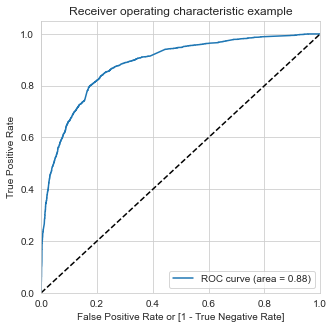

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [129]:
#Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

# Finding Optimal Cutoff Point

In [130]:
#columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.394166,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.109236,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.175834,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.767591,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.085432,3934,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives


In [132]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.594465  0.967964  0.364318
0.2   0.2  0.756648  0.898621  0.669165
0.3   0.3  0.801948  0.848743  0.773113
0.4   0.4  0.806277  0.743309  0.845077
0.5   0.5  0.810451  0.673560  0.894803
0.6   0.6  0.801020  0.605028  0.921789
0.7   0.7  0.787260  0.530008  0.945777
0.8   0.8  0.764533  0.427818  0.972014
0.9   0.9  0.721861  0.291565  0.987006


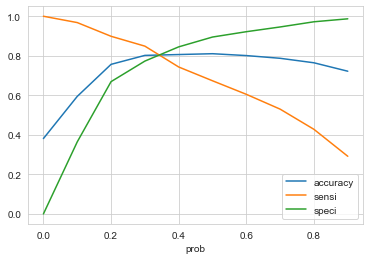

In [133]:
# accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.394166,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.109236,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175834,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.767591,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.085432,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [135]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [136]:
from sklearn import metrics
# Finding Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.806895485466914, Sensitivity 0.8227899432278994, specifitiy 0.7971014492753623  


In [137]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3581  421]
 [ 805 1661]]


# Assigning Lead Score to the Training data

In [138]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.394166,1871,0,1,1,1,1,0,0,0,0,0,0,1,39
1,0,0.109236,6795,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.175834,3516,0,1,1,0,0,0,0,0,0,0,0,0,18
3,0,0.767591,8105,1,1,1,1,1,1,1,1,1,0,0,1,77
4,0,0.085432,3934,0,1,0,0,0,0,0,0,0,0,0,0,9


# Model Evaluation

In [139]:
# checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.806895485466914


In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3190,  812],
       [ 437, 2029]], dtype=int64)

In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8227899432278994


In [143]:
# calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7971014492753623


In [144]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.2028985507246377


In [145]:
# positive predictive value 
print (TP / float(TP+FP))

0.7141851460753256


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8795147504824924


# Precision and Recall

In [147]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3581,  421],
       [ 805, 1661]], dtype=int64)

In [149]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7141851460753256

In [150]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8227899432278994

# Precision and recall tradeoff

In [151]:
from sklearn.metrics import precision_recall_curve

#y_train_pred_final.Converted, y_train_pred_final.predicted

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

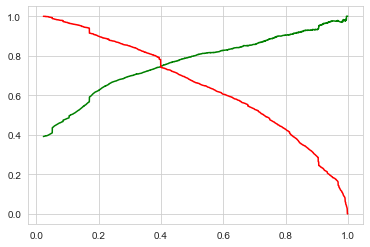

In [153]:
# trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [155]:
X_test = X_test[col1]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0.031873,0.444982,0.145455,0,0,0,0,0,1,1,0,0,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,1,1,0,0,0,0
7766,0.019920,0.025968,0.090909,0,0,0,0,0,0,0,1,0,0,1
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,1,0
4359,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0


In [156]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.674619
2376    0.906324
7766    0.963620
9199    0.050589
4359    0.904727
9186    0.493754
1631    0.406293
8963    0.233605
8007    0.058958
5324    0.357560
dtype: float64

In [157]:
# Converting y_pred to a dataframe
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Removing index for both dataframe to append them
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [160]:
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.674619
1,1,0.906324
2,1,0.963620
3,0,0.050589
4,1,0.904727


In [161]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [162]:
y_pred_final.head()

,Converted,Converted_Prob,final_test_predicted
0,1,0.674619,1
1,1,0.906324,1
2,1,0.963620,1
3,0,0.050589,0
4,1,0.904727,1


In [163]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [164]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.8152958152958153, Sensitivity 0.7990867579908676, specitiy 0.8258795468097794  


In [165]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Converted_Prob,final_test_predicted,Lead_Score
0,1,0.674619,1,67
1,1,0.906324,1,91
2,1,0.963620,1,96
3,0,0.050589,0,5
4,1,0.904727,1,90


# Conclusion

* The leads on whom an email or SMS was opened last must be our primary emphasis.
* Focusing on clients who have invested a lot of time on our website is always a good idea.
* It's advisable to pay least attention to the clients to whom they sent mail that was returned.
* If the lead source is a referral, the potential lead could not actually be that person

In [ ]:
#More on conclusion summary is available on PDF.